# Lets build a model to classify MNIST digits using the layers we created

In [6]:
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from dense import Dense
from activations import Tanh
from loss_functions import mse_loss, mse_loss_derivative
from engine import train, predict
from activations import ReLU

In [7]:
def preprocessing(x, y, limit):
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype(np.float32) / 255.0

    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)

    return x[:limit], y[:limit]

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocessing(x_train, y_train, 10000)
x_test, y_test = preprocessing(x_test, y_test, 20)

In [9]:
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh()
]

In [10]:
train(network, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.001)

Epoch 1/100, Error: 0.1064
Epoch 2/100, Error: 0.0651
Epoch 3/100, Error: 0.0564
Epoch 4/100, Error: 0.0518
Epoch 5/100, Error: 0.0488
Epoch 6/100, Error: 0.0465
Epoch 7/100, Error: 0.0446
Epoch 8/100, Error: 0.0430
Epoch 9/100, Error: 0.0416
Epoch 10/100, Error: 0.0404
Epoch 11/100, Error: 0.0393
Epoch 12/100, Error: 0.0383
Epoch 13/100, Error: 0.0374
Epoch 14/100, Error: 0.0366
Epoch 15/100, Error: 0.0358
Epoch 16/100, Error: 0.0351
Epoch 17/100, Error: 0.0345
Epoch 18/100, Error: 0.0339
Epoch 19/100, Error: 0.0333
Epoch 20/100, Error: 0.0328
Epoch 21/100, Error: 0.0323
Epoch 22/100, Error: 0.0318
Epoch 23/100, Error: 0.0314
Epoch 24/100, Error: 0.0310
Epoch 25/100, Error: 0.0306
Epoch 26/100, Error: 0.0302
Epoch 27/100, Error: 0.0298
Epoch 28/100, Error: 0.0295
Epoch 29/100, Error: 0.0291
Epoch 30/100, Error: 0.0288
Epoch 31/100, Error: 0.0285
Epoch 32/100, Error: 0.0282
Epoch 33/100, Error: 0.0279
Epoch 34/100, Error: 0.0277
Epoch 35/100, Error: 0.0274
Epoch 36/100, Error: 0.0271
E

In [11]:
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))

pred: 7 	true: 7
pred: 2 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 4 	true: 4
pred: 9 	true: 9
pred: 6 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 8 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 5 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 8 	true: 3
pred: 4 	true: 4


### lets try to add some layers to the network

In [19]:
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh(),
    Dense(10, 10),
    Tanh()
]

In [13]:
train(network, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.001)

Epoch 1/100, Error: 0.1157
Epoch 2/100, Error: 0.0727
Epoch 3/100, Error: 0.0646
Epoch 4/100, Error: 0.0605
Epoch 5/100, Error: 0.0577
Epoch 6/100, Error: 0.0555
Epoch 7/100, Error: 0.0536
Epoch 8/100, Error: 0.0518
Epoch 9/100, Error: 0.0501
Epoch 10/100, Error: 0.0484
Epoch 11/100, Error: 0.0469
Epoch 12/100, Error: 0.0454
Epoch 13/100, Error: 0.0441
Epoch 14/100, Error: 0.0428
Epoch 15/100, Error: 0.0416
Epoch 16/100, Error: 0.0404
Epoch 17/100, Error: 0.0393
Epoch 18/100, Error: 0.0383
Epoch 19/100, Error: 0.0374
Epoch 20/100, Error: 0.0365
Epoch 21/100, Error: 0.0356
Epoch 22/100, Error: 0.0349
Epoch 23/100, Error: 0.0341
Epoch 24/100, Error: 0.0335
Epoch 25/100, Error: 0.0329
Epoch 26/100, Error: 0.0323
Epoch 27/100, Error: 0.0317
Epoch 28/100, Error: 0.0312
Epoch 29/100, Error: 0.0307
Epoch 30/100, Error: 0.0303
Epoch 31/100, Error: 0.0298
Epoch 32/100, Error: 0.0294
Epoch 33/100, Error: 0.0290
Epoch 34/100, Error: 0.0287
Epoch 35/100, Error: 0.0283
Epoch 36/100, Error: 0.0280
E

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")
print(y_pred_list)

Accuracy): 95.00%

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


### we can see there are predictions only for 20 pics, lets try to test it on more data

In [18]:
# lets try more data for training as well
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocessing(x_train, y_train, 30000)
x_test, y_test = preprocessing(x_test, y_test, 500)

In [20]:
train(network, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.001)

Epoch 1/100, Error: 0.0804
Epoch 2/100, Error: 0.0567
Epoch 3/100, Error: 0.0513
Epoch 4/100, Error: 0.0476
Epoch 5/100, Error: 0.0449
Epoch 6/100, Error: 0.0426
Epoch 7/100, Error: 0.0407
Epoch 8/100, Error: 0.0390
Epoch 9/100, Error: 0.0374
Epoch 10/100, Error: 0.0358
Epoch 11/100, Error: 0.0344
Epoch 12/100, Error: 0.0330
Epoch 13/100, Error: 0.0318
Epoch 14/100, Error: 0.0307
Epoch 15/100, Error: 0.0297
Epoch 16/100, Error: 0.0288
Epoch 17/100, Error: 0.0280
Epoch 18/100, Error: 0.0273
Epoch 19/100, Error: 0.0266
Epoch 20/100, Error: 0.0260
Epoch 21/100, Error: 0.0255
Epoch 22/100, Error: 0.0250
Epoch 23/100, Error: 0.0245
Epoch 24/100, Error: 0.0241
Epoch 25/100, Error: 0.0237
Epoch 26/100, Error: 0.0233
Epoch 27/100, Error: 0.0229
Epoch 28/100, Error: 0.0226
Epoch 29/100, Error: 0.0223
Epoch 30/100, Error: 0.0220
Epoch 31/100, Error: 0.0217
Epoch 32/100, Error: 0.0214
Epoch 33/100, Error: 0.0212
Epoch 34/100, Error: 0.0209
Epoch 35/100, Error: 0.0207
Epoch 36/100, Error: 0.0205
E

In [28]:
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 94.40%



### We achieved 94.4% accuracy on 500 test samples, lets check the classification report and confusion matrix

In [22]:
print("Classification report:")
print(classification_report(y_true_list, y_pred_list))

Classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       0.99      1.00      0.99        67
           2       0.98      0.91      0.94        55
           3       0.93      0.93      0.93        45
           4       0.98      0.96      0.97        55
           5       0.96      0.90      0.93        50
           6       0.91      0.93      0.92        43
           7       0.90      0.94      0.92        49
           8       0.88      0.95      0.92        40
           9       0.94      0.91      0.92        54

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



In [23]:
print(confusion_matrix(y_true_list, y_pred_list))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  2  1  2]
 [ 0  0  0 42  0  1  1  1  0  0]
 [ 0  0  0  0 53  0  2  0  0  0]
 [ 1  0  0  2  0 45  1  0  1  0]
 [ 2  0  0  0  0  1 40  0  0  0]
 [ 0  1  1  0  1  0  0 46  0  0]
 [ 0  0  0  0  0  0  0  1 38  1]
 [ 0  0  0  1  0  0  0  1  3 49]]


### lets decode

In [24]:
errors = []
cm = confusion_matrix(y_true_list, y_pred_list)

for true_label in range(cm.shape[0]):
    for pred_label in range(cm.shape[0]):

        if true_label != pred_label:

            error_count = cm[true_label, pred_label]

            if error_count > 0:
                errors.append({
                    'count': error_count,
                    'true': true_label,
                    'pred': pred_label
                })

sorted_errors = sorted(errors, key=lambda e: e['count'], reverse=True)

if not sorted_errors:
    print("no any mistakes found")
else:
    print("Most fequent errors:\n")
    for error in sorted_errors:
        print(f"  - Real digit '{error['true']}' missmatched with '{error['pred']}'   - {error['count']} times")


Most fequent errors:

  - Real digit '9' missmatched with '8'   - 3 times
  - Real digit '2' missmatched with '7'   - 2 times
  - Real digit '2' missmatched with '9'   - 2 times
  - Real digit '4' missmatched with '6'   - 2 times
  - Real digit '5' missmatched with '3'   - 2 times
  - Real digit '6' missmatched with '0'   - 2 times
  - Real digit '2' missmatched with '8'   - 1 times
  - Real digit '3' missmatched with '5'   - 1 times
  - Real digit '3' missmatched with '6'   - 1 times
  - Real digit '3' missmatched with '7'   - 1 times
  - Real digit '5' missmatched with '0'   - 1 times
  - Real digit '5' missmatched with '6'   - 1 times
  - Real digit '5' missmatched with '8'   - 1 times
  - Real digit '6' missmatched with '5'   - 1 times
  - Real digit '7' missmatched with '1'   - 1 times
  - Real digit '7' missmatched with '2'   - 1 times
  - Real digit '7' missmatched with '4'   - 1 times
  - Real digit '8' missmatched with '7'   - 1 times
  - Real digit '8' missmatched with '9'   

found 3 img, where real digit '9' predicted as '8':



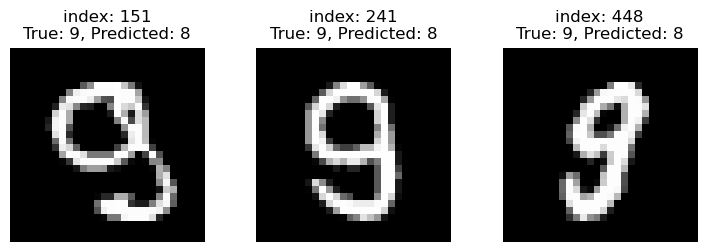

In [27]:
TRUE_LABEL_TO_INSPECT = 9

PRED_LABEL_TO_INSPECT = 8

(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

y_pred_list = []
y_true_list = []
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

specific_error_indexes = np.where(
    (y_true_array == TRUE_LABEL_TO_INSPECT) &
    (y_pred_array == PRED_LABEL_TO_INSPECT)
)[0]

if len(specific_error_indexes) == 0:
    print(f"No errors '{TRUE_LABEL_TO_INSPECT}' with predicted '{PRED_LABEL_TO_INSPECT}'.")
else:
    print(
        f"found {len(specific_error_indexes)} img, where real digit '{TRUE_LABEL_TO_INSPECT}' predicted as '{PRED_LABEL_TO_INSPECT}':\n")

    num_to_show = min(len(specific_error_indexes), 16)
    num_cols = 4
    num_rows = (num_to_show + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 2.5 * num_rows))
    for i, index in enumerate(specific_error_indexes[:num_to_show]):
        plt.subplot(num_rows, num_cols, i + 1)

        plt.imshow(x_test_orig[index], cmap='gray')

        plt.title(f"index: {index}\nTrue: {TRUE_LABEL_TO_INSPECT}, Predicted: {PRED_LABEL_TO_INSPECT}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### lets feed our model with the rest of data

In [29]:
remaining_x_train = x_train_orig[30000:]
remaining_y_train = y_train_orig[30000:]

x_train_remaining_processed, y_train_remaining_processed = preprocessing(
    remaining_x_train,
    remaining_y_train,
    len(remaining_x_train)
)

train(
    network,
    mse_loss,
    mse_loss_derivative,
    x_train_remaining_processed,
    y_train_remaining_processed,
    epochs=20,
    learning_rate=0.001
)

print("Training on remaining data completed.")

Epoch 1/20, Error: 0.0153
Epoch 2/20, Error: 0.0151
Epoch 3/20, Error: 0.0150
Epoch 4/20, Error: 0.0149
Epoch 5/20, Error: 0.0148
Epoch 6/20, Error: 0.0147
Epoch 7/20, Error: 0.0146
Epoch 8/20, Error: 0.0145
Epoch 9/20, Error: 0.0145
Epoch 10/20, Error: 0.0144
Epoch 11/20, Error: 0.0143
Epoch 12/20, Error: 0.0142
Epoch 13/20, Error: 0.0142
Epoch 14/20, Error: 0.0141
Epoch 15/20, Error: 0.0140
Epoch 16/20, Error: 0.0140
Epoch 17/20, Error: 0.0139
Epoch 18/20, Error: 0.0138
Epoch 19/20, Error: 0.0138
Epoch 20/20, Error: 0.0137
Training on remaining data completed.


### our model shows good results, lets check the accuracy again

In [30]:
x_test_new, y_test_new = x_test_orig[500:], y_test_orig[500:]
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 94.60%



### After we feeded our model with the rest of data, we achieved only 94.6% accuracy, so lets try to change our architecture